In [ ]:
# SOLVING THE BUSINESS PROBELM THROUGH LOGISTIC REGRESSION AND DECISION TREE

# This project aims to identify the key factors that influence passenger satisfaction and develop a
# model to predict whether a passenger is likely to be satisfied or dissatisfied based on survey data.

In [3]:
# Import the data set
import pandas as pd
import numpy as np
df = pd.read_csv("/content/test.csv")

# View first few rows
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
# What is unnamed 0? I don't think we need it. I also don't think id is helpful either so lets drop them?

In [4]:
# Dropping the 2 uneccessary columns.
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

#Check that they got dropped
df.columns[:10]
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
# Check missing values
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [6]:
# What I did here is fill in all the missing values with median of arrival delay in minutes
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [7]:
# Check that missing values are handled
df['Arrival Delay in Minutes'].isnull().sum()

np.int64(0)

In [8]:
# Now let's look at our data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [9]:
# We have 5 categorical (object) columns...17 numeric (int)...1 floating(float64)
# Machine learning models can’t handle text — they can only work with numbers.
# So we’ll convert those 5 columns into numeric format.

# But we’ll do it in two parts:
# 1. Convert the target column (satisfaction) to binary numbers.
# 2. Encode the remaining categorical columns (the features).

In [10]:
# 1. Convert the target column (satisfaction) to binary numbers.
df['satisfaction'].value_counts()

# Now convert it into numbers
df['satisfaction'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0,})

In [11]:
# Check
df['satisfaction'].unique()

array([1, 0])

In [12]:
# Now let's encode the other features
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [13]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int64  
 4   Class                              25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

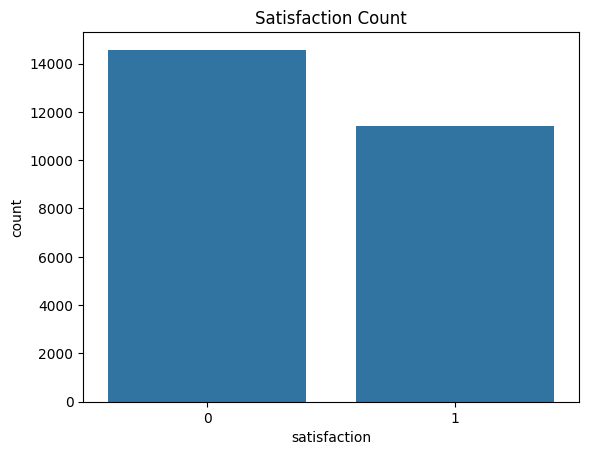

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot satisfaction count
sns.countplot(data=df, x='satisfaction')
plt.title('Satisfaction Count')
plt.show()

In [15]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [16]:
# Check possible outliers
num_cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    pct = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({pct:.2f}%)")

    # Keep all the outliers because maybe ...
    # 1. Flight distance: Some flights may be very short and some very long
    # 2. Departure Delay: Some flights delayed much longer than usual
    # 3. Same as above — large but realistic delays

Flight Distance: 584 outliers (2.25%)
Departure Delay in Minutes: 3569 outliers (13.74%)
Arrival Delay in Minutes: 3538 outliers (13.62%)


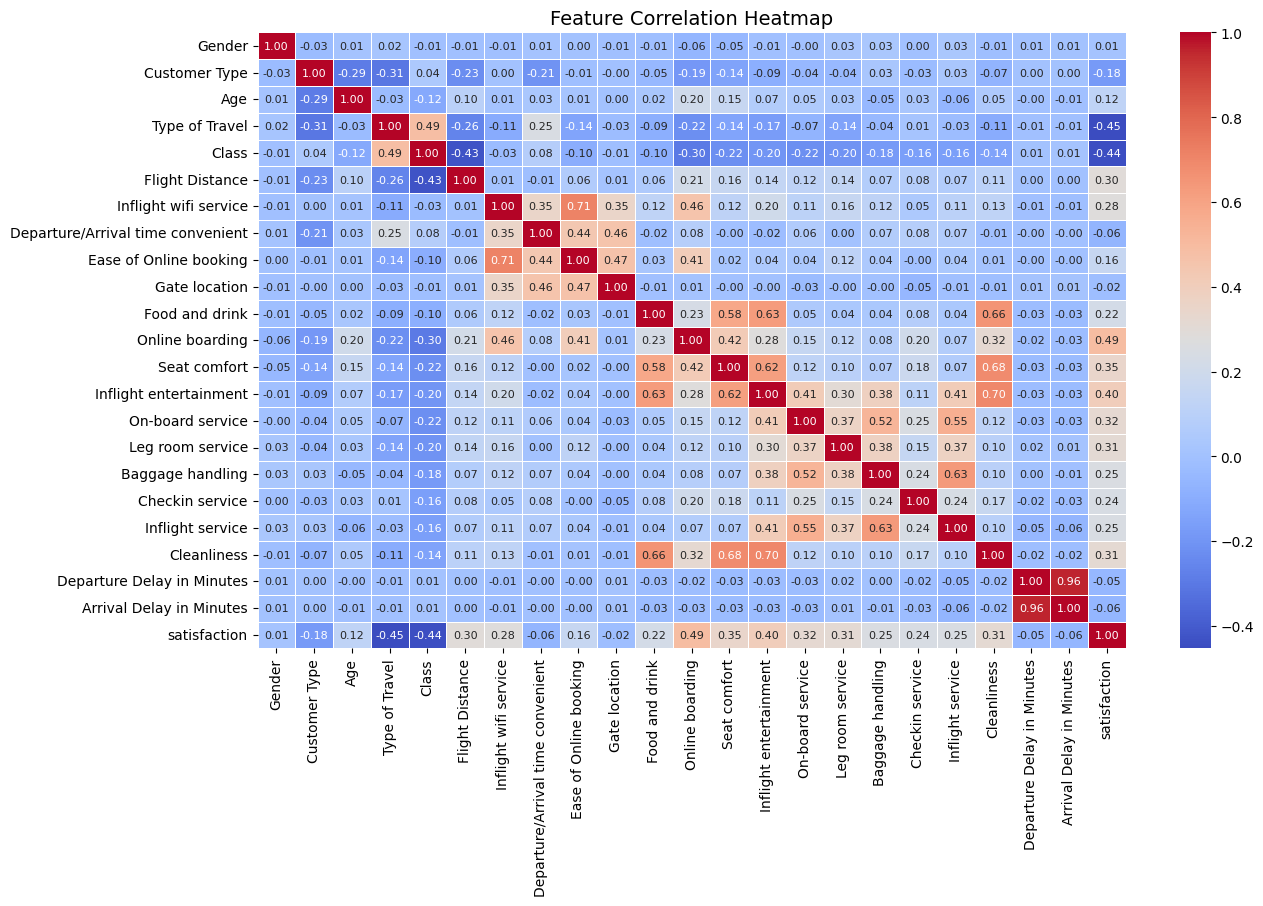

In [17]:
# Creating a heatmap to look at correlations
# When two features are highly correlated (e.g., Departure Delay and Arrival Delay)
# they contain almost the same information.
# Including both in some models (like Logistic Regression) can:
# 1. cause multicollinearity (unstable coefficients),
# 2. make the model more complex than necessary,
# 3. slightly reduce interpretability.
# So, plotting a correlation heatmap to visually check which numeric columns move together.

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation = df.corr()

# Plot heatmap
plt.figure(figsize=(14,8))
sns.heatmap(
    correlation,
    annot=True,            # show correlation values
    fmt='.2f',             # limit decimals
    annot_kws={'size': 8}, # smaller annotation text
    linewidths=0.5,
    cmap='coolwarm'        # color scheme
)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [18]:
# We see that Departure Delay in Minutes ↔ Arrival Delay in Minutes → 0.96 correlation
# They’re basically measuring the same thing.

# Can safely drop one of them
# Code to keep just Arrival Delay in Minutes, since it represents the final delay outcome.
# Below is code to drop "Departure Delay in Minutes"

df.drop('Departure Delay in Minutes', axis=1, inplace=True)

In [19]:
# -------------------------- DONE CLEANING AND PREPARING THE DATA --------------------------------------------

In [20]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (20780, 21)
Testing set shape: (5196, 21)


Accuracy: 0.8698999230177059

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      2915
           1       0.86      0.84      0.85      2281

    accuracy                           0.87      5196
   macro avg       0.87      0.87      0.87      5196
weighted avg       0.87      0.87      0.87      5196

ROC AUC: 0.9264


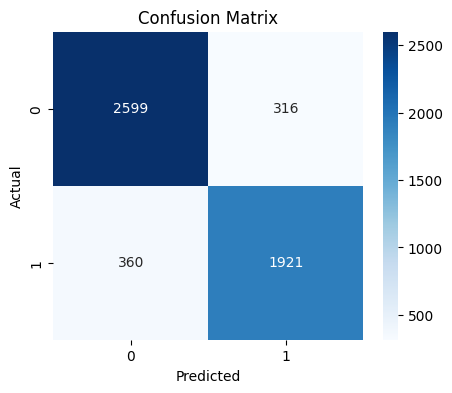

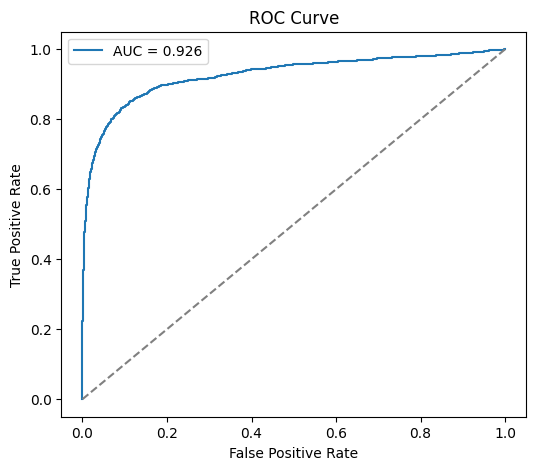


Top features by absolute coefficient (positive increases prob of satisfaction):


,feature,coef
3,Type of Travel,-1.329215
11,Online boarding,0.826104
1,Customer Type,-0.819657
6,Inflight wifi service,0.578402
17,Checkin service,0.442336
14,On-board service,0.378050
15,Leg room service,0.320376
19,Cleanliness,0.314688
8,Ease of Online booking,-0.287059
4,Class,-0.273374


In [21]:
# LET'S GO AHEAD WITH LOGISTIC REGRESSION TESTING FIRST
# ---------------------------
# Logistic Regression: scale, fit, evaluate, visualize, save
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
import joblib

# 1) Prepare copies for logistic regression (so tree model can use raw data)
X_train_lr = X_train.copy()
X_test_lr  = X_test.copy()

# 2) Fit scaler only on training data — prevent data leakage
scaler = StandardScaler()
X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled  = scaler.transform(X_test_lr)

# 3) Train logistic regression
lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train_lr_scaled, y_train)

# 4) Predict and evaluate
y_pred = lr.predict(X_test_lr_scaled)
y_proba = lr.predict_proba(X_test_lr_scaled)[:, 1]  # prob for positive class (satisfied)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
try:
    auc = roc_auc_score(y_test, y_proba)
    print("ROC AUC:", round(auc, 4))
except Exception as e:
    print("ROC AUC could not be computed:", e)

# 5) Confusion matrix (colored)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 6) ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.3f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 7) Coefficients interpretation (feature -> coef)
# If X_train is a DataFrame, get names; otherwise build a list
if hasattr(X_train, "columns"):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"f{i}" for i in range(X_train.shape[1])]

coefs = lr.coef_.ravel()
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

print("\nTop features by absolute coefficient (positive increases prob of satisfaction):")
display(coef_df.head(12)[['feature','coef']])

In [22]:
# In the confusion matrix ( 0 = dissatisfied and 1 = satisfied )
# According to our matrix .. We have a strong balance — both classes are predicted well.
# AUC of 0.926 means your model can correctly distinguish satisfied/dissatisfied passengers ~ 93% of the time
# This is excellent performance for logistic regression.

# Most influential positive factors: Online boarding, Wi-Fi, Check-in service.
# Most influential negative factors: Type of Travel, Customer Type, Delay times.

Decision Tree Accuracy: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      2915
           1       0.89      0.92      0.91      2281

    accuracy                           0.92      5196
   macro avg       0.91      0.92      0.92      5196
weighted avg       0.92      0.92      0.92      5196



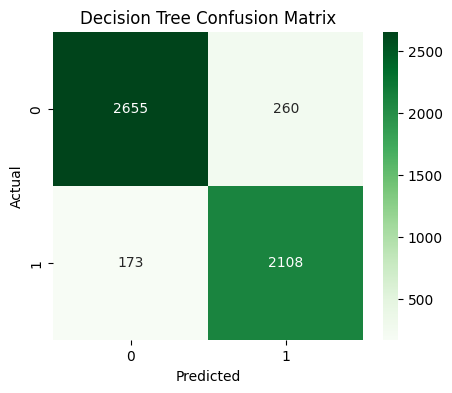


Top Features by Importance:


,Feature,Importance
11,Online boarding,0.398872
6,Inflight wifi service,0.247932
3,Type of Travel,0.161187
13,Inflight entertainment,0.063072
1,Customer Type,0.050874
4,Class,0.040518
17,Checkin service,0.013590
9,Gate location,0.008195
12,Seat comfort,0.007091
20,Arrival Delay in Minutes,0.002788


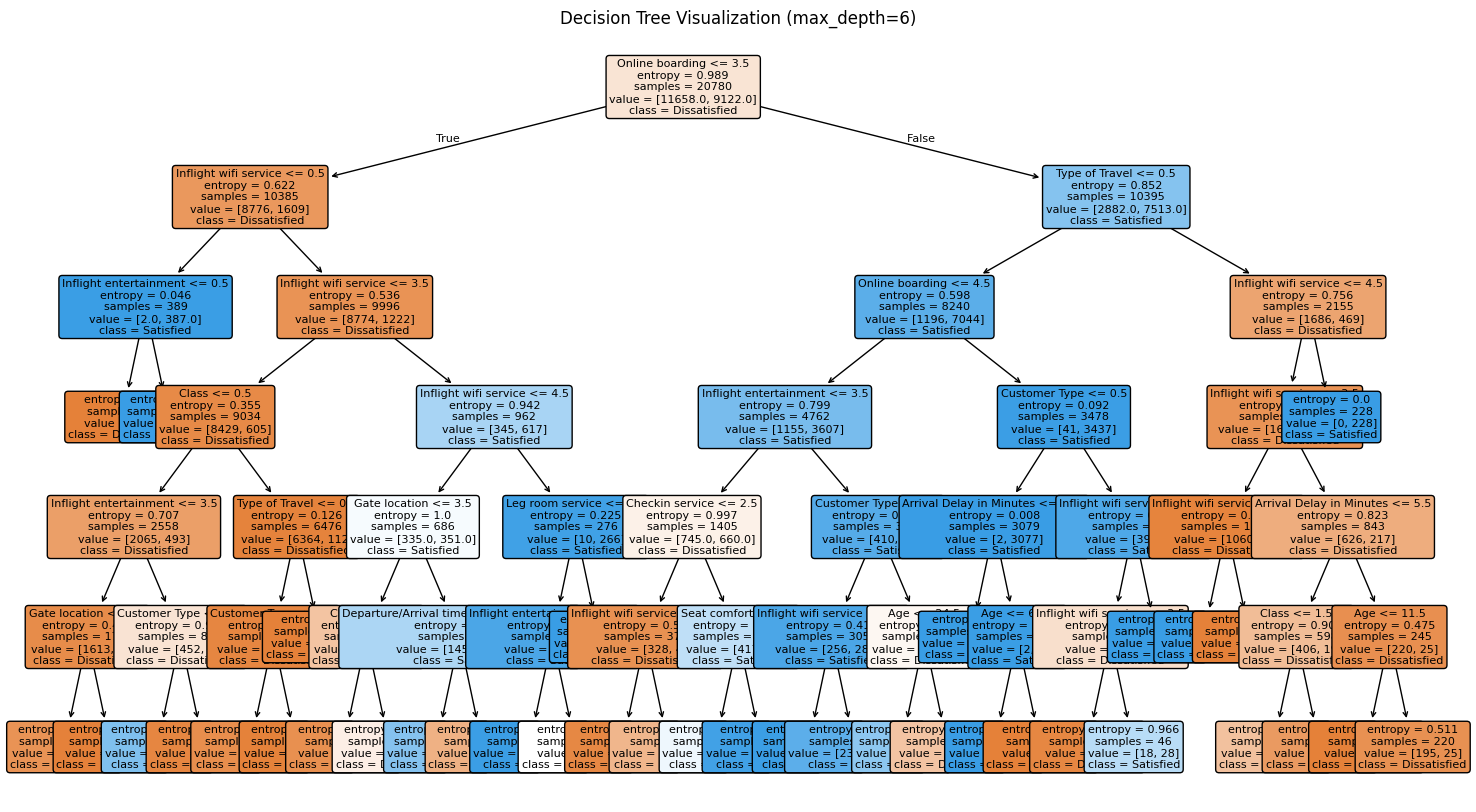

In [23]:
# LET'S NOW GO TO THE DECISION TREE TESTING
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(
    criterion='entropy',     # or 'entropy' if you prefer information gain
    max_depth=6,          # limit depth to prevent overfitting
    random_state=42
)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Feature Importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features by Importance:")
display(importances.head(10))

# Optional: Visualize the tree (for slides)
plt.figure(figsize=(18,10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Dissatisfied', 'Satisfied'], rounded=True, fontsize=8)
plt.title("Decision Tree Visualization (max_depth=6)")
plt.show()

In [24]:
# INSIGHTS

# Decision Tree performed slightly better — it captures nonlinear relationships the logistic model can’t.
#It shows Online boarding and Inflight wifi are the biggest drivers of satisfaction.

# Both models are consistent — confirming your data is clean and strong.

# Logistic Regression, while slightly less accurate, is more interpretable
# Great for explaining which features increase or decrease satisfaction.

# Why the Decision Tree performs better

# 1. Captures nonlinear relationships:
# Logistic Regression assumes a straight-line (linear) relationship between features and the outcome.
# But passenger satisfaction depends on combinations of factors (like Wi-Fi + boarding + travel type).
# Decision Trees can easily model these complex, “if–then” patterns.

# 2. Handles interactions automatically:
# Example: If Type of Travel = Business and Online boarding rating ≥ 4, then high satisfaction.
# Logistic Regression can’t capture such conditional relationships unless you manually create interaction terms.

# 3. Insensitive to feature scaling:
# Trees don’t need normalization — they split directly based on feature values, making them robust when different features have different ranges.

# 4. Good for mixed data (categorical + numeric):
# Your dataset has both types of variables, and trees handle them naturally.

In [25]:
# Test for Overfitting

In [26]:
# Evaluate Logistic Regression on Training Data
y_pred_train_lr = lr.predict(X_train_lr_scaled)
acc_train_lr = accuracy_score(y_train, y_pred_train_lr)

# Evaluate Decision Tree on Training Data
y_pred_train_dt = dt_model.predict(X_train)
acc_train_dt = accuracy_score(y_train, y_pred_train_dt)

print("Logistic Regression:")
print(f"  Training Accuracy: {acc_train_lr:.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test, lr.predict(X_test_lr_scaled)):.4f}")

print("\nDecision Tree:")
print(f"  Training Accuracy: {acc_train_dt:.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test, dt_model.predict(X_test)):.4f}")

# Further interpretation will be provided after execution.

Logistic Regression:
  Training Accuracy: 0.8711
  Test Accuracy: 0.8699

Decision Tree:
  Training Accuracy: 0.9203
  Test Accuracy: 0.9167
